step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder

from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate

In [2]:
df=pd.read_csv(r"C:\Users\sowda\Downloads\Fraud.csv") 

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


df.info()

In [4]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns
ndf=df[numerical]

cdf=df[categorical]

In [5]:
ndf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [6]:
new_dataset_size = 100000

# Generate random indices
random_indices = np.random.choice(ndf.index, size=new_dataset_size, replace=False)

# Form the new dataset
new_ndf = ndf.loc[random_indices, :]

In [7]:
new_ndf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6301983,683,95086.87,91826.00,186912.87,24170.81,0.00,0,0
5094663,355,57052.29,9520676.30,9577728.58,303691.13,365461.42,0,0
162187,12,14172.31,0.00,0.00,0.00,0.00,0,0
1155704,131,259326.45,8021254.50,8280580.94,4198033.18,3938706.74,0,0
3255454,251,99911.59,277729.00,177817.41,0.00,99911.59,0,0
...,...,...,...,...,...,...,...,...
5752486,399,3623.34,12166.00,8542.66,0.00,0.00,0,0
4557558,327,695.97,0.00,0.00,0.00,0.00,0,0
4814272,346,10546.70,0.00,0.00,0.00,0.00,0,0
2590483,207,152339.24,46276.88,0.00,3755628.67,3907967.91,0,0


In [8]:
columns_to_drop = ["step","isFraud","isFlaggedFraud"]


x= new_ndf.drop(columns=columns_to_drop)

In [9]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6301983,95086.87,91826.00,186912.87,24170.81,0.00
5094663,57052.29,9520676.30,9577728.58,303691.13,365461.42
162187,14172.31,0.00,0.00,0.00,0.00
1155704,259326.45,8021254.50,8280580.94,4198033.18,3938706.74
3255454,99911.59,277729.00,177817.41,0.00,99911.59
...,...,...,...,...,...
5752486,3623.34,12166.00,8542.66,0.00,0.00
4557558,695.97,0.00,0.00,0.00,0.00
4814272,10546.70,0.00,0.00,0.00,0.00
2590483,152339.24,46276.88,0.00,3755628.67,3907967.91


In [10]:
y=new_ndf['isFraud']

In [11]:
y

6301983    0
5094663    0
162187     0
1155704    0
3255454    0
          ..
5752486    0
4557558    0
4814272    0
2590483    0
4273114    0
Name: isFraud, Length: 100000, dtype: int64

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(x),Counter(y)}')

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

print(f'Resampled dataset shape {Counter(x_res),Counter(y_res)}')

Original dataset shape : (Counter({'amount': 1, 'oldbalanceOrg': 1, 'newbalanceOrig': 1, 'oldbalanceDest': 1, 'newbalanceDest': 1}), Counter({0: 99890, 1: 110}))
Resampled dataset shape (Counter({'amount': 1, 'oldbalanceOrg': 1, 'newbalanceOrig': 1, 'oldbalanceDest': 1, 'newbalanceDest': 1}), Counter({0: 99890, 1: 99890}))


In [13]:
x.shape

(100000, 5)

In [14]:
x_res.shape

(199780, 5)

In [15]:
x_res

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9.508687e+04,9.182600e+04,186912.87,2.417081e+04,0.000000e+00
1,5.705229e+04,9.520676e+06,9577728.58,3.036911e+05,3.654614e+05
2,1.417231e+04,0.000000e+00,0.00,0.000000e+00,0.000000e+00
3,2.593265e+05,8.021254e+06,8280580.94,4.198033e+06,3.938707e+06
4,9.991159e+04,2.777290e+05,177817.41,0.000000e+00,9.991159e+04
...,...,...,...,...,...
199775,3.026186e+05,3.026186e+05,0.00,2.149363e+05,5.175549e+05
199776,5.448475e+05,5.448475e+05,0.00,0.000000e+00,0.000000e+00
199777,1.737343e+04,1.737343e+04,0.00,0.000000e+00,1.382773e+04
199778,1.130964e+05,1.130964e+05,0.00,0.000000e+00,0.000000e+00


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)

In [17]:
x_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
172038,2.886902e+06,2.886902e+06,0.00,1.059386e+06,3.946287e+06
61158,8.440650e+04,1.197780e+05,35371.50,0.000000e+00,8.440650e+04
178664,3.333109e+05,3.333109e+05,0.00,0.000000e+00,0.000000e+00
95269,4.310851e+05,0.000000e+00,0.00,6.542291e+06,6.973376e+06
14366,1.433476e+06,1.890000e+02,0.00,9.242799e+04,1.525904e+06
...,...,...,...,...,...
176963,2.203275e+04,2.203275e+04,0.00,4.694526e+02,2.250219e+04
117952,8.260359e+06,8.260359e+06,0.00,0.000000e+00,0.000000e+00
173685,2.725413e+05,2.725413e+05,0.00,2.454152e+04,2.970828e+05
43567,6.730154e+04,3.507951e+06,3575252.25,3.011284e+05,2.338269e+05


In [18]:
x_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
14024,3.276923e+04,6.756100e+04,100330.23,235705.860000,2.029366e+05
180377,2.273005e+05,2.273005e+05,0.00,0.000000,0.000000e+00
157858,1.930330e+04,1.930330e+04,0.00,282.849092,1.958614e+04
198973,1.853788e+04,1.853788e+04,0.00,98.806563,1.863668e+04
175304,2.247406e+05,2.247406e+05,0.00,0.000000,6.596072e+03
...,...,...,...,...,...
104354,7.479463e+06,7.479463e+06,0.00,0.000000,0.000000e+00
50615,1.057050e+05,1.527700e+04,0.00,301784.000000,4.074890e+05
192911,1.844773e+05,1.844773e+05,0.00,27393.815439,2.701540e+05
128710,1.230682e+06,1.230682e+06,0.00,0.000000,0.000000e+00


In [19]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled= pd.DataFrame(data=x_train_scaled,columns=x_train.columns)
x_train_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.056915,0.083299,0.000000,0.005941,0.018398
1,0.001664,0.003456,0.001022,0.000000,0.000394
2,0.006571,0.009617,0.000000,0.000000,0.000000
3,0.008499,0.000000,0.000000,0.036692,0.032510
4,0.028261,0.000005,0.000000,0.000518,0.007114
...,...,...,...,...,...
149830,0.000434,0.000636,0.000000,0.000003,0.000105
149831,0.162851,0.238345,0.000000,0.000000,0.000000
149832,0.005373,0.007864,0.000000,0.000138,0.001385
149833,0.001327,0.101219,0.103282,0.001689,0.001090


In [20]:
scaler = MinMaxScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled= pd.DataFrame(data=x_test_scaled,columns=x_test.columns)
x_test_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.001368,0.002103,0.003122,1.390384e-03,0.001196
1,0.009490,0.007074,0.000000,0.000000e+00,0.000000
2,0.000806,0.000601,0.000000,1.668473e-06,0.000115
3,0.000774,0.000577,0.000000,5.828410e-07,0.000110
4,0.009383,0.006994,0.000000,0.000000e+00,0.000039
...,...,...,...,...,...
49940,0.312260,0.232774,0.000000,0.000000e+00,0.000000
49941,0.004413,0.000475,0.000000,1.780166e-03,0.002402
49942,0.007702,0.005741,0.000000,1.615909e-04,0.001592
49943,0.051380,0.038301,0.000000,0.000000e+00,0.000000


In [21]:
x_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,149835.0,0.014681,0.032768,0.0,0.000676,0.003756,0.009058,1.0
oldbalanceOrg,149835.0,0.031110,0.074208,0.0,0.000316,0.004235,0.020597,1.0
newbalanceOrig,149835.0,0.012573,0.061957,0.0,0.000000,0.000000,0.000000,1.0
oldbalanceDest,149835.0,0.003975,0.013500,0.0,0.000000,0.000000,0.002595,1.0
newbalanceDest,149835.0,0.005101,0.013404,0.0,0.000000,0.000200,0.004454,1.0


In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)







Accuracy: 0.9984783261587746


Accuracy: 0.9267750590685195

Accuracy: 0.9925486739844563

Accuracy: 0.8933392077542356

Accuracy: 0.9471439726109676

In [23]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

[[24814    72]
 [    4 25055]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24886
           1       1.00      1.00      1.00     25059

    accuracy                           1.00     49945
   macro avg       1.00      1.00      1.00     49945
weighted avg       1.00      1.00      1.00     49945

--------------------------------------------------------


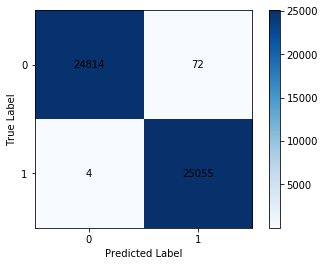

In [24]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# add labels to the plot
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# add values to the cells of the heatmap
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

# display the plot
plt.show()


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


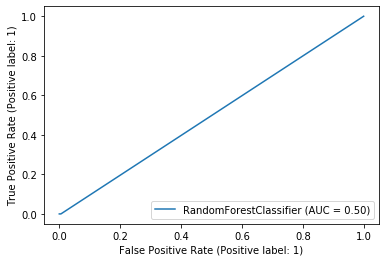

In [25]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, x_test_scaled, y_test);

C:\Users\sowda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


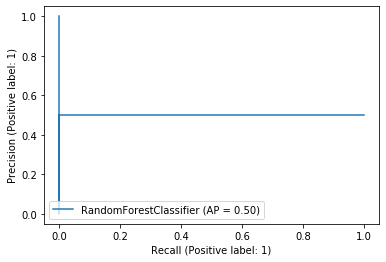

In [26]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, x_test_scaled, y_test);

In [27]:
x_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
14024,3.276923e+04,6.756100e+04,100330.23,235705.860000,2.029366e+05
180377,2.273005e+05,2.273005e+05,0.00,0.000000,0.000000e+00
157858,1.930330e+04,1.930330e+04,0.00,282.849092,1.958614e+04
198973,1.853788e+04,1.853788e+04,0.00,98.806563,1.863668e+04
175304,2.247406e+05,2.247406e+05,0.00,0.000000,6.596072e+03
...,...,...,...,...,...
104354,7.479463e+06,7.479463e+06,0.00,0.000000,0.000000e+00
50615,1.057050e+05,1.527700e+04,0.00,301784.000000,4.074890e+05
192911,1.844773e+05,1.844773e+05,0.00,27393.815439,2.701540e+05
128710,1.230682e+06,1.230682e+06,0.00,0.000000,0.000000e+00


In [28]:
y_test

14024     0
180377    1
157858    1
198973    1
175304    1
         ..
104354    1
50615     0
192911    1
128710    1
140908    1
Name: isFraud, Length: 49945, dtype: int64

In [29]:
row=x_test.iloc[3]
row

amount            18537.877992
oldbalanceOrg     18537.877992
newbalanceOrig        0.000000
oldbalanceDest       98.806563
newbalanceDest    18636.682674
Name: 198973, dtype: float64

In [30]:
col=y_test.iloc[3]
col

1

In [31]:
# Load the test data into a numpy array
test_case = np.array(row)

# Reshape the test data to a 2D array
test_case = test_case.reshape(1, -1)

# Make the prediction for the test data
prediction = clf.predict(test_case)

# Print the prediction
print(prediction)



[1]


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
